# Homework 2
## GEO 371T/GEO 391

### Objectives: Learn to use pandas, numpy and seaborn
### We will use a well log 

qsiwell2.csv

https://pangea.stanford.edu/researchgroups/srb/resources/books/quantitative-seismic-interpretation

### What are well-logs?

Well-logs are single point measurements of physical properties of the subsurface recorded in a well and vary vertically with depth. The properties are random and aperiodic and depend on factors like mineral composition or lithology, porosity, cementation and compaction, presence of fluids etc., A suite of conventional well-logs recorded from an offshore area is shown. Each log (column) shows how the properties vary with depth. Here, we are looking at sediments that were deposited 5 to 16 million years ago!! 

Typical well log recording:
* DEPTH - depth at which measurements have been made
* VP - compression wave (P-wave) velocity
* VS - shear wave velocity
* RHO_OLD - density
* GR - Gamma ray count
* NPHI - Neutron porosity
* VPVS - Vp/Vs
* IP - P-impedance
* IS - Shear-impedance
* VSH - shale volume
* RHOm - maytrix density
* RHOf - fluid density
* PHI - porosity

Note: Once the log meaurements are made, a geologist would examine the values and come up with his interpretation of lithology/rock types (e.g., brine sand, gas-sand, oil-sand, shale etc) at each depth point.

## The Tasks

* Import well log data
* Examine the columns
* Remove bad values
* add/delete colums
* examine corrleaton between parameters
* create a new lithology curve log;
* plot different logs and the interpreted lithology



Import essential libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

### Set the directory path & load the data

In [3]:
logs = pd.read_csv('qsiwell2.csv')

* What type of logs do we have?
* How many rows and how many columns?

In [4]:
logs.head()

,DEPTH,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOf,PHI
0,2013.2528,2294.7,876.9,1.9972,91.8785,0.4908,2.240104,1.0,1.0,2.616832,5144.846857,2112.418072,0.493621,2.728979,1.09,0.294312
1,2013.4052,2296.7,943.0,2.0455,86.8004,0.4833,2.240104,1.0,1.0,2.435525,5144.846857,2112.418072,0.436010,2.719762,1.09,0.294312
2,2013.5576,2290.4,912.5,2.1122,86.0021,0.4474,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.718313,1.09,0.292342
3,2013.7100,2277.5,891.6,2.1960,87.3570,0.4140,2.242800,1.0,1.0,2.554397,5107.977000,1999.680480,0.442325,2.720772,1.09,0.293096
4,2013.8624,2262.0,890.5,2.2020,90.4024,0.4293,2.240064,1.0,1.0,2.540146,5067.024768,1994.776992,0.476875,2.726300,1.09,0.297156


In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPTH    4117 non-null   float64
 1   VP       4117 non-null   float64
 2   VS       4117 non-null   float64
 3   RHO_OLD  4117 non-null   float64
 4   GR       4117 non-null   float64
 5   NPHI     4117 non-null   float64
 6   RHO      2701 non-null   float64
 7   SW       2702 non-null   float64
 8   SWX      2702 non-null   float64
 9   VPVS     4116 non-null   float64
 10  IP       2701 non-null   float64
 11  IS       2701 non-null   float64
 12  VSH      4116 non-null   float64
 13  RHOm     4117 non-null   float64
 14  RHOf     2702 non-null   float64
 15  PHI      2702 non-null   float64
dtypes: float64(16)
memory usage: 514.8 KB


* Delete the column RHO_OLD
* check to make sure that it has indeed been deleted

In [6]:
logs.drop('RHO_OLD',inplace = True,axis = 1)

How can we check if we have really deleted `RHO_OLD`:?

In [7]:
#Use logs.info() to check if RHO_OLD is present or not
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   4117 non-null   float64
 1   VP      4117 non-null   float64
 2   VS      4117 non-null   float64
 3   GR      4117 non-null   float64
 4   NPHI    4117 non-null   float64
 5   RHO     2701 non-null   float64
 6   SW      2702 non-null   float64
 7   SWX     2702 non-null   float64
 8   VPVS    4116 non-null   float64
 9   IP      2701 non-null   float64
 10  IS      2701 non-null   float64
 11  VSH     4116 non-null   float64
 12  RHOm    4117 non-null   float64
 13  RHOf    2702 non-null   float64
 14  PHI     2702 non-null   float64
dtypes: float64(15)
memory usage: 482.6 KB


* Rename RHOf to RHOfluid (Hint, use DataFrame.rename() )


In [8]:
logs.rename(columns = {'RHOf':'RHOfluid'},inplace = True)
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH     4117 non-null   float64
 1   VP        4117 non-null   float64
 2   VS        4117 non-null   float64
 3   GR        4117 non-null   float64
 4   NPHI      4117 non-null   float64
 5   RHO       2701 non-null   float64
 6   SW        2702 non-null   float64
 7   SWX       2702 non-null   float64
 8   VPVS      4116 non-null   float64
 9   IP        2701 non-null   float64
 10  IS        2701 non-null   float64
 11  VSH       4116 non-null   float64
 12  RHOm      4117 non-null   float64
 13  RHOfluid  2702 non-null   float64
 14  PHI       2702 non-null   float64
dtypes: float64(15)
memory usage: 482.6 KB


* How do you check the min, max and mean values of a particular data column?

In [9]:
print(logs['RHOfluid'].mean())
print(logs['RHOfluid'].min())
print(logs['RHOfluid'].max())

1.0742138287933047
0.839717716535434
1.09


* What are the min, max, std etc values of each column of the data?
* What are the min, max, std values of VP, VS, RHO, PHI?

In [10]:
logs.describe()

,DEPTH,VP,VS,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOfluid,PHI
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,2701.000000,2702.000000,2702.000000,4116.000000,2701.000000,2701.000000,4116.000000,4117.000000,2702.000000,2702.000000
mean,2326.892000,2977.098761,1371.293952,72.785125,0.321164,2.225045,0.949077,0.988455,2.212475,6232.839386,2816.336694,0.276969,2.694321,1.074214,0.291760
std,181.145666,449.355552,297.056552,14.464120,0.090255,0.061961,0.161898,0.038373,0.231963,798.193079,589.260460,0.164100,0.026255,0.050188,0.032191
min,2013.252800,1439.900000,688.800000,48.368700,0.067800,2.036616,0.192638,0.641176,0.801994,4206.314727,1534.932941,0.000000,2.650000,0.839718,0.106844
25%,2170.072500,2594.500000,1141.600000,60.683100,0.276200,2.185285,1.000000,1.000000,2.041339,5522.421092,2256.356375,0.139707,2.672353,1.090000,0.276221
50%,2326.892100,3036.100000,1415.300000,68.026600,0.306300,2.223544,1.000000,1.000000,2.158649,6190.471100,2846.315780,0.222938,2.685683,1.090000,0.297309
75%,2483.711700,3251.100000,1595.000000,83.557200,0.392700,2.264000,1.000000,1.000000,2.349562,6936.208845,3298.179392,0.398985,2.713874,1.090000,0.310516
max,2640.531200,4431.000000,2427.800000,136.512800,0.533700,2.545268,1.000000,1.000000,3.266269,8311.770494,4560.425997,1.000000,2.810000,1.090000,0.376396


In [11]:
logs[{'VP','VS','RHO','PHI'}].describe()

,VS,VP,RHO,PHI
count,4117.000000,4117.000000,2701.000000,2702.000000
mean,1371.293952,2977.098761,2.225045,0.291760
std,297.056552,449.355552,0.061961,0.032191
min,688.800000,1439.900000,2.036616,0.106844
25%,1141.600000,2594.500000,2.185285,0.276221
50%,1415.300000,3036.100000,2.223544,0.297309
75%,1595.000000,3251.100000,2.264000,0.310516
max,2427.800000,4431.000000,2.545268,0.376396


## Check for NaN values in the log
### Restrict your calculation to depth range 0-2400 m then replace the NaN values by the average 

In [27]:
logs = logs.loc[(logs.DEPTH>=0) & (logs.DEPTH<=2400)]
#Check for NAN values
logs.isnull().values.any()

False

# Compute lithofacies logs

### Complete the missing sections of code below
### First, restrict your calculation to depth range 2100-2400 m

* lithofacies will be computed using delimiting values in VSH (shale volume) and SW (water saturation)

1) sand_cutoff = 0.20 \
2) brine_sand = ((logs.VSH <= sand_cutoff) & (logs.SW >= 0.9)) \
3) oil_sand = ((logs.VSH <= sand_cutoff) & (logs.SW < 0.9)) \
4) shale = (logs.VSH > sand_cutoff)

### Use the above delimiting values to create the `LFC` log and store it into the  DataFrame

### Use this numeric scheme to store in the LFC log
* LFC=0: undef
* LFC=1: brine sand
* LFC=2: oil sand
* LFC=3: gas sand
* LFC=4: shale

### Then
* count the samples of each of the facies.
* make histogram plots
* make a 1X4 plot as follows:
** (1,1) Vsh, phi and Sw
** (1,2) Ip
** (1,3) Vp/vs
** (1,4) lithofacies (different colors for different facies)
** Makes sure to put axes labels, captions, legend etc.

#### Include your code here

In [13]:
logs = logs.loc[(logs.DEPTH>=2100) & (logs.DEPTH<=2400)]

sand_cutoff = 0.20
brine_sand = ((logs.VSH <= sand_cutoff) & (logs.SW >= 0.9))

#FILL IN YOUR CODE HERE
oil_sand = ((logs.VSH <= sand_cutoff) & (logs.SW < 0.9)) 
shale =(logs.VSH > sand_cutoff)


Use the above flag logs to create the `LFC` log and store it into the `logs` DataFrame:
#### Include your code here

In [14]:
temp_lfc = np.zeros(np.shape(logs.VSH))
temp_lfc[brine_sand.values] = 1    # LFC will be 1 when ssb (brine sand flag) is True
temp_lfc[oil_sand.values] = 2
temp_lfc[shale.values] = 4
#FILL IN YOUR CODE HERE TO INCLUDE OIL SAND AND SHEL IN TEMP_LFC

logs['LFC'] = temp_lfc             # Copy the temporary log temp_lfc into the DataFrame with name `LFC`

logs.to_csv('qsiwell2_lfc.csv',index=False) # save the data

Now, let's see if this is all ok; the total number of samples after zooming in the 2100-2400 m depth window is:

In [15]:
np.shape(logs.VSH)

(1968,)

and the following prints out how many samples each facies is made of:

In [16]:
string = "brine sst={0}, oil sst={1}, shale={2}"
data = (np.count_nonzero(brine_sand),
        np.count_nonzero(oil_sand),
        np.count_nonzero(shale))
print(string.format(*data))

brine sst=706, oil sst=134, shale=1128


And a final check to make this newly defined `LFC` log only has values within the range 1 to 4 (there will be no undefined samples in this particular depth interval, i.e. classes with `LFC=0`):

In [17]:
print("LFC min: {0}, LFC max: {1}".format(logs.LFC.min(), logs.LFC.max()))

LFC min: 1.0, LFC max: 4.0


It is very easy to do plots of all types with `pandas`, and to show that here's a one-liner that plots $V_\mathrm{P}$ histograms for each class (remember that at this point we only have classes 1, 2 and 4, i.e. brine sand, oil sand and shales):

array([<AxesSubplot:title={'center':'1.0'}>,
       <AxesSubplot:title={'center':'2.0'}>,
       <AxesSubplot:title={'center':'4.0'}>], dtype=object)

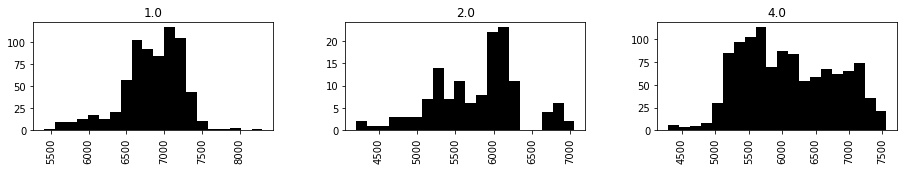

In [18]:
logs.IP.hist(bins=20, color='black', by=logs.LFC, figsize=(15,2), layout=(1,3), lw=0)
#plt.savefig("histograms.png", dpi=250)

## Summary plots

The next few cells visualize the results. No need to do anything until the IP/VPVS crossplot.

First we need a custom colormap for my classes, i.e. a discrete colormap with following classes-colors association:

* LFC=0: undef, GRAY
* LFC=1: brine sand, BLUE
* LFC=2: oil sand, GREEN
* LFC=3: gas sand, RED
* LFC=4: shale, BROWN

This is the way to define this colormap:

In [19]:
import matplotlib.colors as colors
#      0=undef   1=bri  2=oil   3=gas 4=shale
ccc = ['#B3B3B3','blue','green','red','#996633',]
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

Let's now display a summary view of all the logs:

[Text(-50.0, 0, ''), Text(0.0, 0, ''), Text(50.0, 0, ''), Text(100.0, 0, '')]

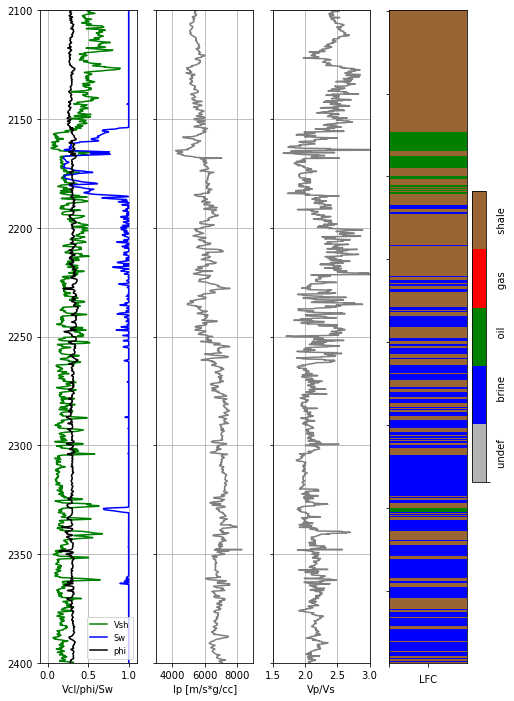

In [20]:
ztop=2100; zbot=2400
ll=logs.loc[(logs.DEPTH>=ztop) & (logs.DEPTH<=zbot)]

cluster=np.repeat(np.expand_dims(ll['LFC'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 12))
ax[0].plot(ll.VSH, ll.DEPTH, '-g', label='Vsh')
ax[0].plot(ll.SW, ll.DEPTH, '-b', label='Sw')
ax[0].plot(ll.PHI, ll.DEPTH, '-k', label='phi')
ax[1].plot(ll.IP, ll.DEPTH, '-', color='0.5')
ax[2].plot(ll.VPVS, ll.DEPTH, '-', color='0.5')
im=ax[3].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=0,vmax=4)

cbar=plt.colorbar(im, ax=ax[3])
# cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
# cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1))
cbar.set_label((12*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
ax[0].legend(fontsize='small', loc='lower right')
ax[0].set_xlabel("Vcl/phi/Sw"),    ax[0].set_xlim(-.1,1.1)
ax[1].set_xlabel("Ip [m/s*g/cc]"), ax[1].set_xlim(3000,9000)
ax[2].set_xlabel("Vp/Vs"),         ax[2].set_xlim(1.5,3)
ax[3].set_xlabel('LFC')
ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[3].set_xticklabels([])

#plt.savefig("log.png", dpi=250)

### The following code will make a cross-plot of IP vs VPVS and color code using lithofacies. 
### Comment on the results.

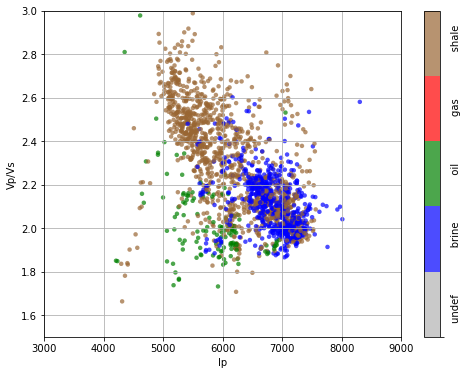

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(logs.IP, logs.VPVS,20, c=logs.LFC,
            marker='o', edgecolors='none',
            alpha=0.7, cmap=cmap_facies,
            vmin=0, vmax=4)
plt.xlim(3000, 9000); plt.ylim(1.5, 3);
plt.xlabel('Ip'); plt.ylabel('Vp/Vs')
plt.grid();

cbar = plt.colorbar()
cbar.set_label((15*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

#plt.savefig("crossplot.png", dpi=250)

### Make crossplots between IP, VPVS, VSH, SW using seaborn

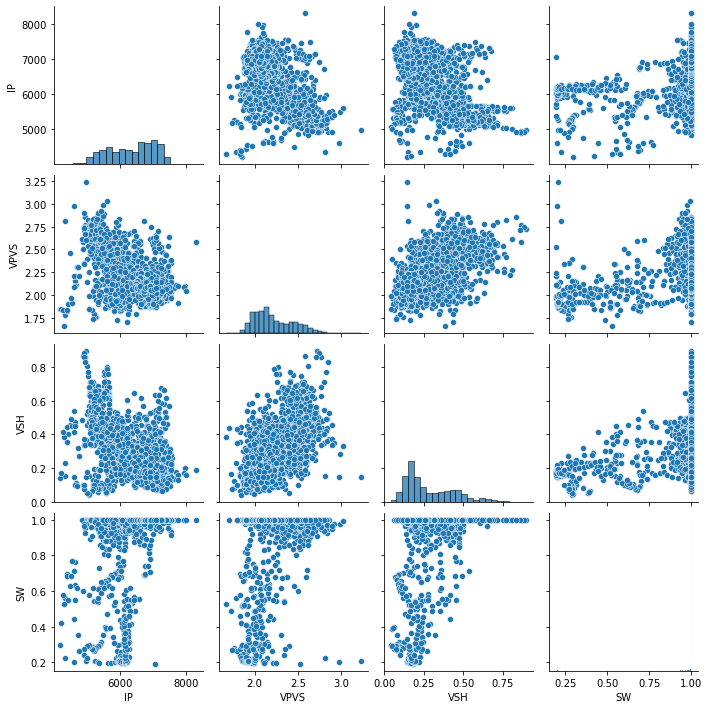

In [24]:
import seaborn as sns
cols = ['IP','VPVS','VSH','SW']
sns.pairplot(logs[cols])

### Make correlation plots between IP, VPVS, VSH, SW using seaborn heatmap

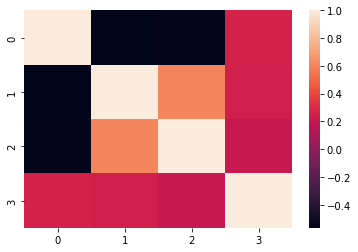

In [25]:
cm = np.corrcoef(logs[cols].values.T)
hm = sns.heatmap(cm)
plt.show()

## References

* Avseth, P., Mukerji, T. & Mavko, G. Quantitative Seismic Interpretation. (Cambridge University Press, 2005).


See also the awesome collection of tutorials curated by Matt Hall for [The Leading Edge](http://library.seg.org/journal/leedff) and available here: <https://github.com/seg/tutorials>

<hr />
<p style="color:gray">©2015 Alessandro Amato del Monte, openly licensed under the terms of <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC-BY-SA</a>. This tutorial appeared in SEG Leading Edge in April 2015. </p>